<a href="https://colab.research.google.com/github/AyushPS0712/Oil-Well-Parameter-Analysor/blob/main/Day_3_Visualizations_Prithvi_Singh_Chauhan_ISM_PE_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas
===

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
df = pd.read_excel('Volve_production_data.xlsx',sheet_name='Daily Production Data')

In [ ]:
df.head(5)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [ ]:
df = df[["DATEPRD","NPD_WELL_BORE_NAME","ON_STREAM_HRS","AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL","FLOW_KIND"]]

In [ ]:
wellA = df[df.NPD_WELL_BORE_NAME == "15/9-F-1 C"]

In [ ]:
wellA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 745
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   746 non-null    datetime64[ns]
 1   NPD_WELL_BORE_NAME        746 non-null    object        
 2   ON_STREAM_HRS             746 non-null    float64       
 3   AVG_DOWNHOLE_PRESSURE     743 non-null    float64       
 4   AVG_DOWNHOLE_TEMPERATURE  743 non-null    float64       
 5   BORE_OIL_VOL              746 non-null    float64       
 6   BORE_GAS_VOL              746 non-null    float64       
 7   BORE_WAT_VOL              746 non-null    float64       
 8   FLOW_KIND                 746 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 58.3+ KB


In [ ]:
wellA.isna().any(axis = 0)


DATEPRD                     False
NPD_WELL_BORE_NAME          False
ON_STREAM_HRS               False
AVG_DOWNHOLE_PRESSURE        True
AVG_DOWNHOLE_TEMPERATURE     True
BORE_OIL_VOL                False
BORE_GAS_VOL                False
BORE_WAT_VOL                False
FLOW_KIND                   False
dtype: bool

In [ ]:
wellA.columns[wellA.isna().any(axis = 0)]
wellA.isna().any(axis = 1)

0      False
1       True
2       True
3       True
4      False
       ...  
741    False
742    False
743    False
744    False
745    False
Length: 746, dtype: bool

In [ ]:
wellA[wellA.isna().any(axis = 1)]

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,0.0,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,0.0,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,0.0,production


In [ ]:
wellA1 = wellA.dropna() ## by default inplace=False to make the drop temporary unless assigned to a new dataframe
wellA1.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.0,0.0,0.0,production
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,0.0,0.0,0.0,production
5,2014-04-12,15/9-F-1 C,0.0,303.50078,96.92339,0.0,0.0,0.0,production
6,2014-04-13,15/9-F-1 C,0.0,303.53481,96.95885,0.0,0.0,0.0,production
7,2014-04-14,15/9-F-1 C,0.0,303.78228,96.96873,0.0,0.0,0.0,production


In [ ]:
wellA1.iloc[[1],1:5]

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE
4,15/9-F-1 C,0.0,310.37614,96.87589


In [ ]:
wellA1.loc[[4],"NPD_WELL_BORE_NAME":"AVG_DOWNHOLE_TEMPERATURE"] ### what if you type 1

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE
4,15/9-F-1 C,0.0,310.37614,96.87589


In [ ]:
wellA2 = wellA.dropna(axis = 1)
wellA2.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.0,0.0,0.0,production
1,2014-04-08,15/9-F-1 C,0.0,0.0,0.0,0.0,production
2,2014-04-09,15/9-F-1 C,0.0,0.0,0.0,0.0,production
3,2014-04-10,15/9-F-1 C,0.0,0.0,0.0,0.0,production
4,2014-04-11,15/9-F-1 C,0.0,0.0,0.0,0.0,production


In [ ]:

wellA4 = wellA.fillna(wellA.mean())
wellA4.head()

C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000000,0.000000,0.0,0.0,0.0,production
1,2014-04-08,15/9-F-1 C,0.0,246.666033,104.925294,0.0,0.0,0.0,production
2,2014-04-09,15/9-F-1 C,0.0,246.666033,104.925294,0.0,0.0,0.0,production
3,2014-04-10,15/9-F-1 C,0.0,246.666033,104.925294,0.0,0.0,0.0,production
4,2014-04-11,15/9-F-1 C,0.0,310.376140,96.875890,0.0,0.0,0.0,production


In [ ]:
wellA5 = wellA.fillna(wellA.median())
wellA5.head()

C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000000,0.000000,0.0,0.0,0.0,production
1,2014-04-08,15/9-F-1 C,0.0,240.637585,107.820459,0.0,0.0,0.0,production
2,2014-04-09,15/9-F-1 C,0.0,240.637585,107.820459,0.0,0.0,0.0,production
3,2014-04-10,15/9-F-1 C,0.0,240.637585,107.820459,0.0,0.0,0.0,production
4,2014-04-11,15/9-F-1 C,0.0,310.376140,96.875890,0.0,0.0,0.0,production


In [ ]:
wellA.drop("BORE_WAT_VOL", axis = 1) ## inplace = False .. so the drop is not permanent

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.0,0.0,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,production
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,0.0,0.0,production
...,...,...,...,...,...,...,...,...
741,2016-04-17,15/9-F-1 C,0.0,270.26849,101.19807,0.0,0.0,production
742,2016-04-18,15/9-F-1 C,0.0,276.86895,101.23102,0.0,0.0,production
743,2016-04-19,15/9-F-1 C,0.0,282.10538,101.17754,0.0,0.0,production
744,2016-04-20,15/9-F-1 C,0.0,285.09577,101.13142,0.0,0.0,production


In [ ]:
wellA1["DATEPRD"] = pd.to_datetime(wellA1.DATEPRD)

C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
wellA1.DATEPRD.dt.year

0      2014
4      2014
5      2014
6      2014
7      2014
       ... 
741    2016
742    2016
743    2016
744    2016
745    2016
Name: DATEPRD, Length: 743, dtype: int64

In [ ]:
wellA1["year"] = wellA1.DATEPRD.dt.year

wellA1["month"] = wellA1.DATEPRD.dt.month

C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
wellA1.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,year,month
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.0,0.0,0.0,production,2014,4
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,0.0,0.0,0.0,production,2014,4
5,2014-04-12,15/9-F-1 C,0.0,303.50078,96.92339,0.0,0.0,0.0,production,2014,4
6,2014-04-13,15/9-F-1 C,0.0,303.53481,96.95885,0.0,0.0,0.0,production,2014,4
7,2014-04-14,15/9-F-1 C,0.0,303.78228,96.96873,0.0,0.0,0.0,production,2014,4


In [ ]:

wellA1["month"] = wellA1.month.map({1:"January", 2:"February", 3: "March",
                   4: "April", 5: "May", 6: "June",
                   7: "July", 8: "August", 9: "Septemeber",
                   10: "October", 11:"November", 12: "December"})

C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
productionData = data[data.FLOW_KIND == "production"]

In [ ]:
# Create Year Column from Date Time Object
productionData["DATEPRD"] = pd.to_datetime(productionData["DATEPRD"])
productionData["YEAR"] = productionData["DATEPRD"].dt.year

C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chauh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
productionData.groupby("NPD_WELL_BORE_NAME").sum()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,YEAR
NPD_WELL_BORE_NAME,,,,,,,
15/9-F-1 C,9983.53315,183272.862798,77959.493534,177709.33,2.644092e+07,207302.39,1503033
15/9-F-11,26006.21614,271162.380252,120921.733869,1147849.10,1.743105e+08,1090806.27,2347021
15/9-F-12,65204.06928,246223.670095,101540.832797,4579609.55,6.675423e+08,6833320.37,6148466
15/9-F-14,62773.67519,710877.683553,290158.064528,3942233.39,5.780095e+08,7121249.74,6148466
15/9-F-15 D,17824.83278,221062.144637,102343.339583,148518.56,2.250535e+07,52366.40,1970579
15/9-F-5,2973.32502,0.000000,0.000000,41160.68,6.561826e+06,13533.18,322560


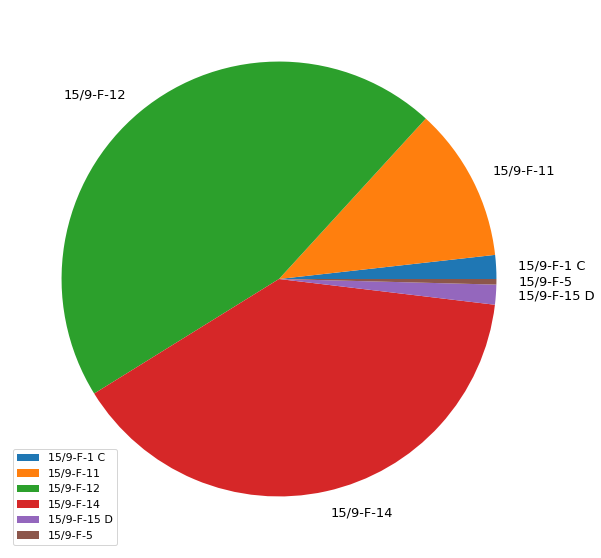

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))

productionData.groupby("NPD_WELL_BORE_NAME").sum().plot.pie(ax = ax, y = "BORE_OIL_VOL", figsize = (20,10), fontsize = 13)

ax.set_ylabel("")

ax.legend(fontsize = 11, loc = 3)

plt.show()

Creating Correlation Matrix
---

In [ ]:
wellA1.set_index('DATEPRD',inplace=True) # make date the index
wellA1.head()

,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,year,month
DATEPRD,,,,,,,,,,
2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.0,0.0,0.0,production,2014,April
2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,0.0,0.0,0.0,production,2014,April
2014-04-12,15/9-F-1 C,0.0,303.50078,96.92339,0.0,0.0,0.0,production,2014,April
2014-04-13,15/9-F-1 C,0.0,303.53481,96.95885,0.0,0.0,0.0,production,2014,April
2014-04-14,15/9-F-1 C,0.0,303.78228,96.96873,0.0,0.0,0.0,production,2014,April


In [ ]:
corr_matrix = wellA1.corr(method = "spearman")


In [ ]:
corr_matrix

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,year
ON_STREAM_HRS,1.000000,-0.680431,0.867190,0.900021,0.900609,0.824137,-0.256166
AVG_DOWNHOLE_PRESSURE,-0.680431,1.000000,-0.803018,-0.712879,-0.714979,-0.467589,0.358382
AVG_DOWNHOLE_TEMPERATURE,0.867190,-0.803018,1.000000,0.758801,0.760886,0.769345,-0.298393
BORE_OIL_VOL,0.900021,-0.712879,0.758801,1.000000,0.998843,0.624659,-0.372121
BORE_GAS_VOL,0.900609,-0.714979,0.760886,0.998843,1.000000,0.627614,-0.368445
BORE_WAT_VOL,0.824137,-0.467589,0.769345,0.624659,0.627614,1.000000,0.115113
year,-0.256166,0.358382,-0.298393,-0.372121,-0.368445,0.115113,1.000000


In [ ]:
# Removing the repeated section of the correlation matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

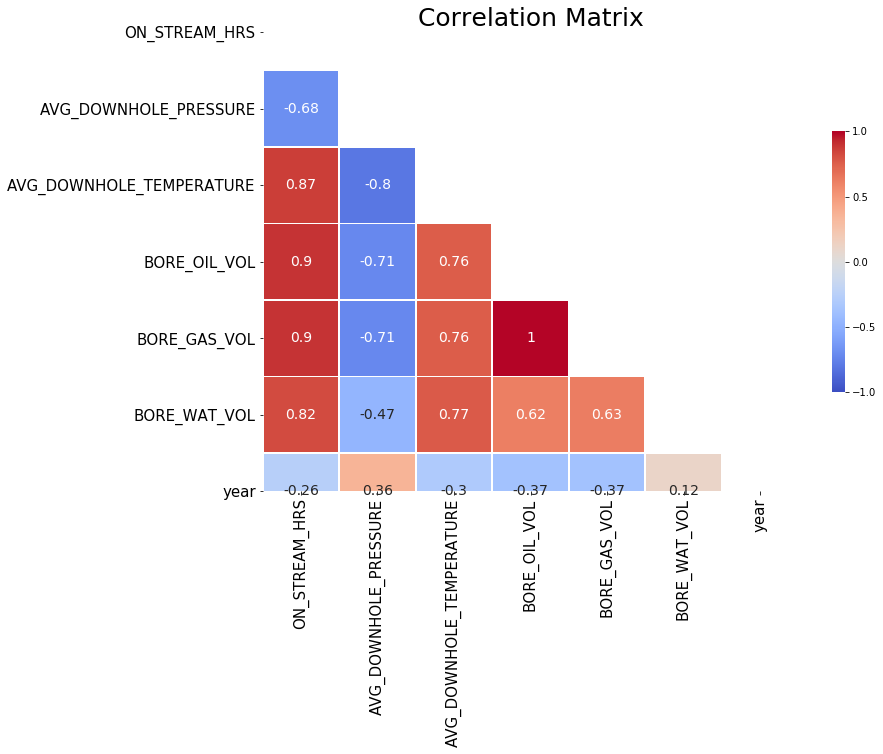

In [ ]:
# Create Axis
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 14})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 25)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

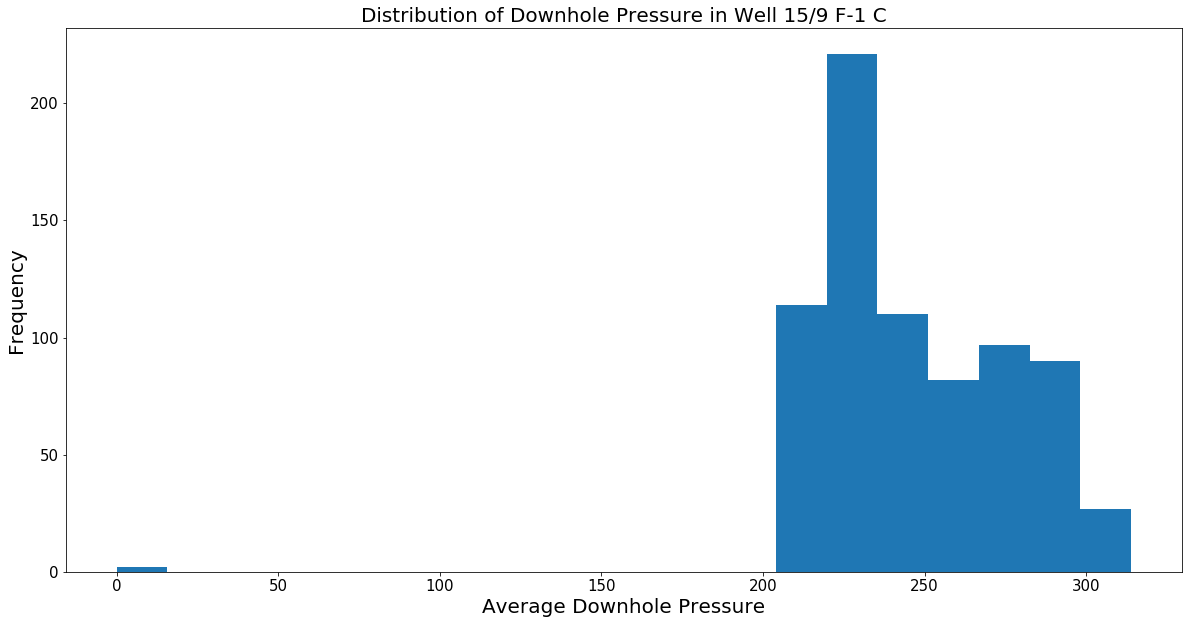

In [ ]:
plt.figure(figsize = (20,10))

wellA1.AVG_DOWNHOLE_PRESSURE.plot(kind = "hist",bins=20)

plt.title("Distribution of Downhole Pressure in Well 15/9 F-1 C", fontsize = 20)

plt.ylabel("Frequency", fontsize = 20)

plt.xlabel("Average Downhole Pressure", fontsize = 20)

plt.xticks(fontsize = 15)

plt.yticks(fontsize = 15)

plt.show()

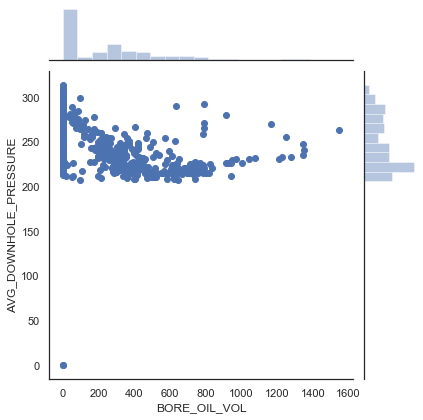

In [ ]:
import seaborn as sns

sns.set(style="white", color_codes=True)

#tips = sns.load_dataset("tips")

g = sns.jointplot(x="BORE_OIL_VOL", y="AVG_DOWNHOLE_PRESSURE", data=wellA1)

Text(0.5, 1.0, 'AVERAGE DOWNHOLE PRESSURE BY YEAR')

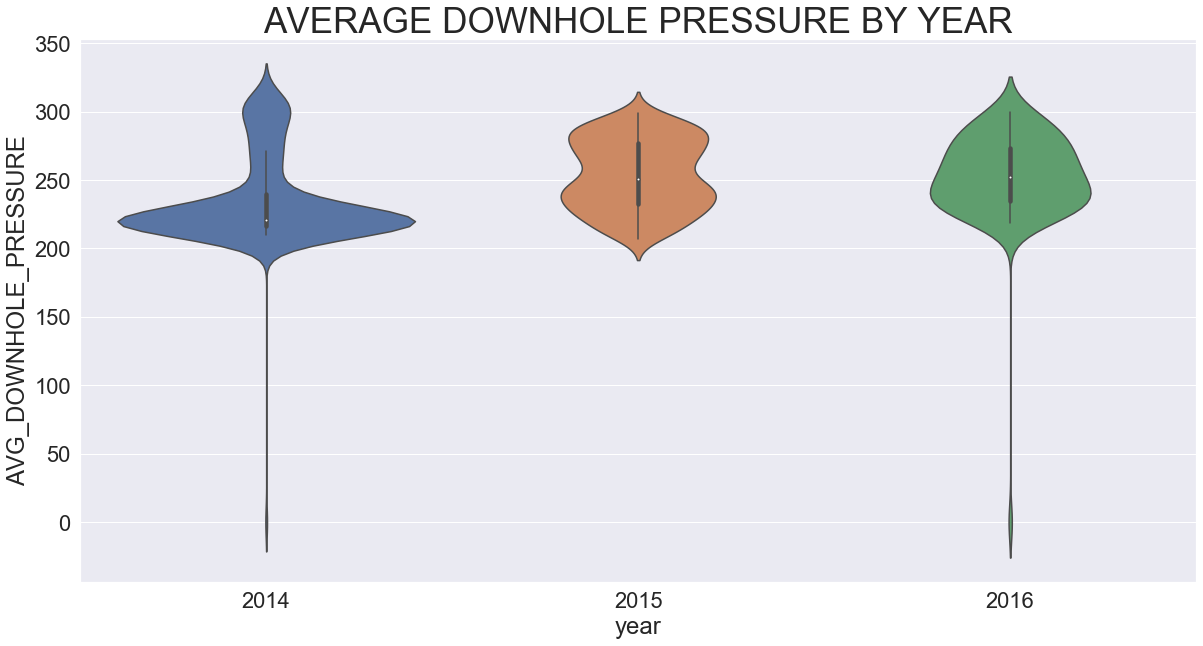

In [ ]:
plt.figure(figsize = (20,10))

sns.set(font_scale = 2)
sns.violinplot(x = "year", y = "AVG_DOWNHOLE_PRESSURE", data = wellA1)

plt.title("AVERAGE DOWNHOLE PRESSURE BY YEAR", fontsize = 35)

Text(0.5, 1.0, 'AVERAGE TEMPERATURE BY YEAR')

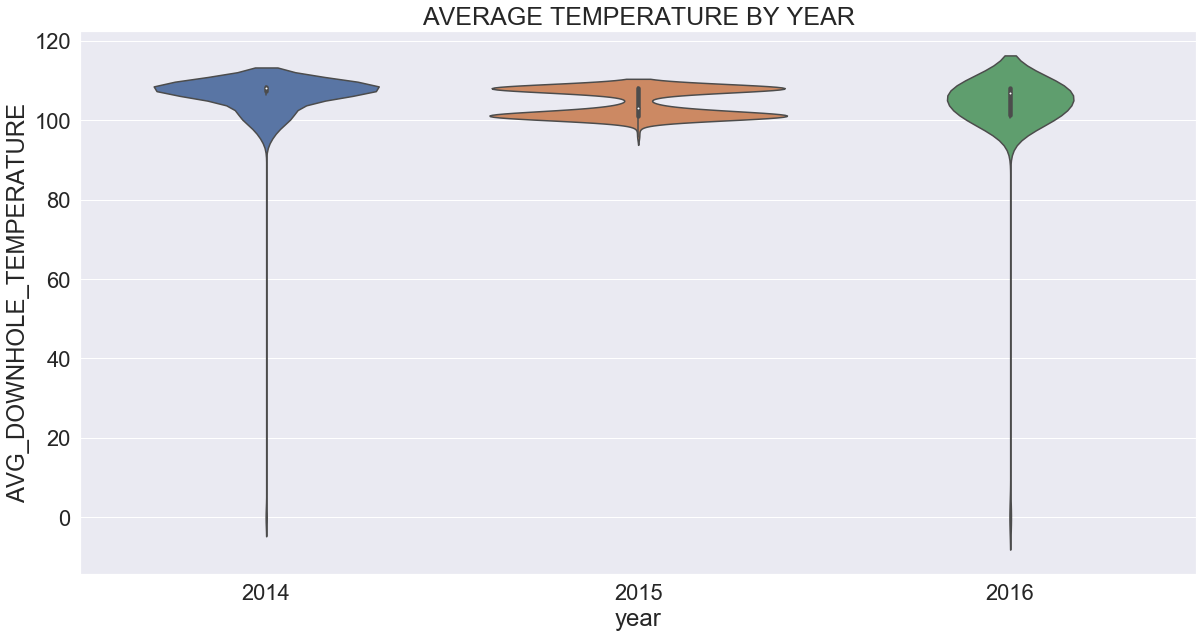

In [ ]:
plt.figure(figsize = (20,10))

sns.violinplot(x = "year", y = "AVG_DOWNHOLE_TEMPERATURE", data = wellA1)

plt.title("AVERAGE TEMPERATURE BY YEAR", fontsize = 25)

Text(0.5, 1.0, 'AVERAGE DOWNHOLE PRESSURE BY YEAR using Seaborn')

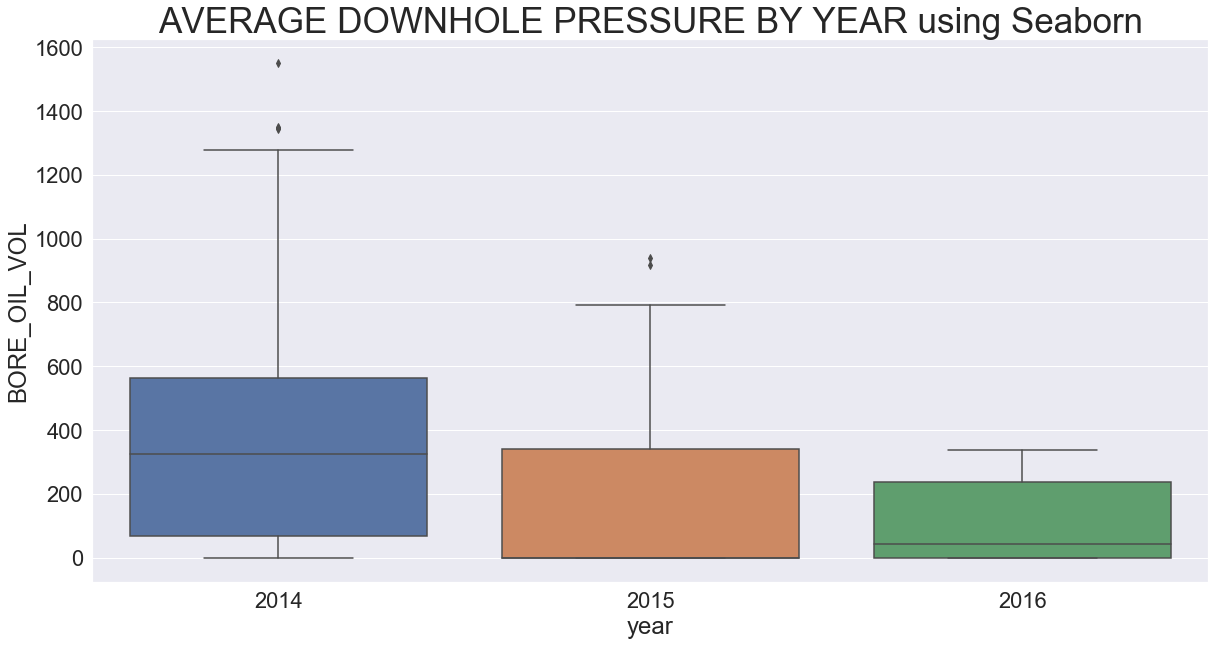

In [ ]:
#Using Seaborn
plt.figure(figsize = (20,10))

sns.boxplot(x = "year", y = "BORE_OIL_VOL", data = wellA1)

plt.title("AVERAGE DOWNHOLE PRESSURE BY YEAR using Seaborn", fontsize = 35)

Text(0, 0.5, 'Pressure')

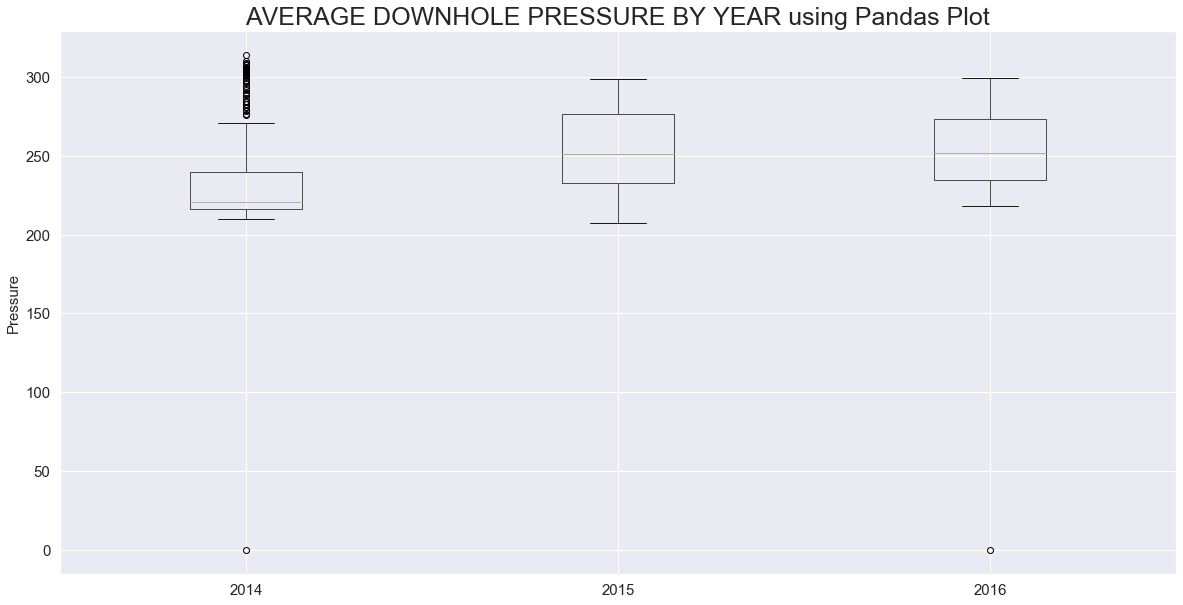

In [ ]:
#Using Pandas Plot Method

pd.pivot(wellA1, values = "AVG_DOWNHOLE_PRESSURE", columns = "year").boxplot(figsize = (20,10), fontsize = 15)

plt.title("AVERAGE DOWNHOLE PRESSURE BY YEAR using Pandas Plot", fontsize = 25)

plt.ylabel("Pressure", fontsize = 15)

In [ ]:
#Load data
well_13 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 13',index_col=0)
well_14 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 14')
well_15 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 15')

In [ ]:
data = pd.concat([well_14, well_15], axis=0)
data['Well'] = data['Well'].astype('category')
data['RT_log'] = np.log10(data.RT) #For Visualization
data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361
...,...,...,...,...,...,...,...,...
1154,4083.5,15,59.7060,1.7590,2.4851,0.1416,CB,0.245266
1155,4084.0,15,58.4170,1.6510,2.4860,0.1416,CB,0.217747
1156,4084.5,15,57.4990,1.5970,2.5311,0.1527,CB,0.203305
1157,4085.0,15,56.7850,1.4820,2.4731,0.1785,CB,0.170848


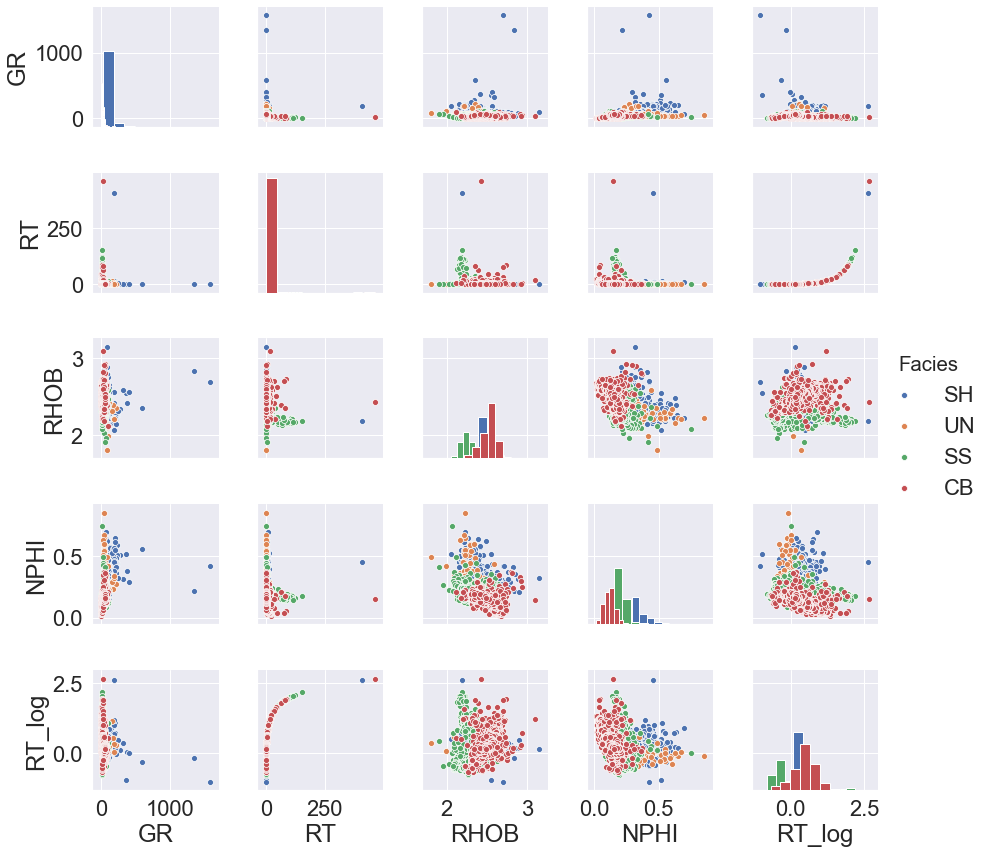

In [ ]:
sns.pairplot(data.drop(['Well','Depth'], axis = 1) ,hue='Facies',diag_kind='hist')

Power is gained by sharing knowledge not hoarding it.
----
----

